### Plot seqfish+ fibroblast data

In [ ]:
import numpy as np
import pandas as pd
import anndata

import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
# from collections import defaultdict

# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

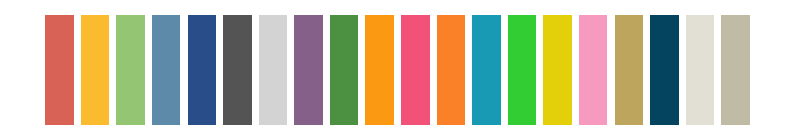

In [2]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

#### load data

In [2]:
path = '../seqfish+_processed.h5ad'
data = anndata.read_h5ad(path)
print(data)

AnnData object with n_obs × n_vars = 179 × 3726
    obs: 'cell_shape', 'nucleus_shape', 'batch', 'cell_radius', 'nucleus_inner_edge_shape', 'cell_inner_edge_shape', 'nucleus_outer_edge_shape', 'n_detected', 'fraction_detected', 'cell_edge_count', 'cell_edge_fraction', 'cytoplasmic_count', 'cytoplasmic_fraction', 'nuclear_count', 'nuclear_fraction', 'nuclear_edge_count', 'nuclear_edge_fraction', 'none_count', 'none_fraction', 'td_cluster'
    var: 'n_detected', 'fraction_detected', 'cell_edge_count', 'cell_edge_fraction', 'cytoplasmic_count', 'cytoplasmic_fraction', 'nuclear_count', 'nuclear_fraction', 'nuclear_edge_count', 'nuclear_edge_fraction', 'none_count', 'none_fraction', 'td_cluster'
    uns: 'points', 'tensor', 'tensor_labels', 'tensor_loadings'
    layers: 'cell_edge', 'cell_edge_p', 'cell_inner_asymmetry', 'cell_inner_proximity', 'cell_outer_asymmetry', 'cell_outer_proximity', 'cytoplasmic', 'cytoplasmic_p', 'l_half_radius', 'l_max', 'l_max_gradient', 'l_min_gradient', 'l_mon

In [3]:
# expression data is stored in `data.uns["points"]`
points = data.uns['points']
cellList = data.obs_names.tolist()
geneList = data.var_names.tolist()
print('#cells', len(cellList), points.cell.nunique())
print('#genes', len(geneList), points.gene.nunique())

# cell and nucleus area
cellShape = data.obs['cell_shape']
nucleusShape = data.obs['nucleus_shape']

#cells 179 179
#genes 3726 7095


#### plot

In [6]:
points.head()

x           y           gene cell nucleus batch
0  1217.437557  557.583252  4933401b06rik  5-0      -1     0
1  1096.190309  394.835294  4933401b06rik  5-0       5     0
2  1093.189494  572.832405  4933401b06rik  5-0      -1     0
3  1005.120220  297.196271  4933401b06rik  5-0      -1     0
4  1142.815026  378.376491  4933401b06rik  5-0      -1     0

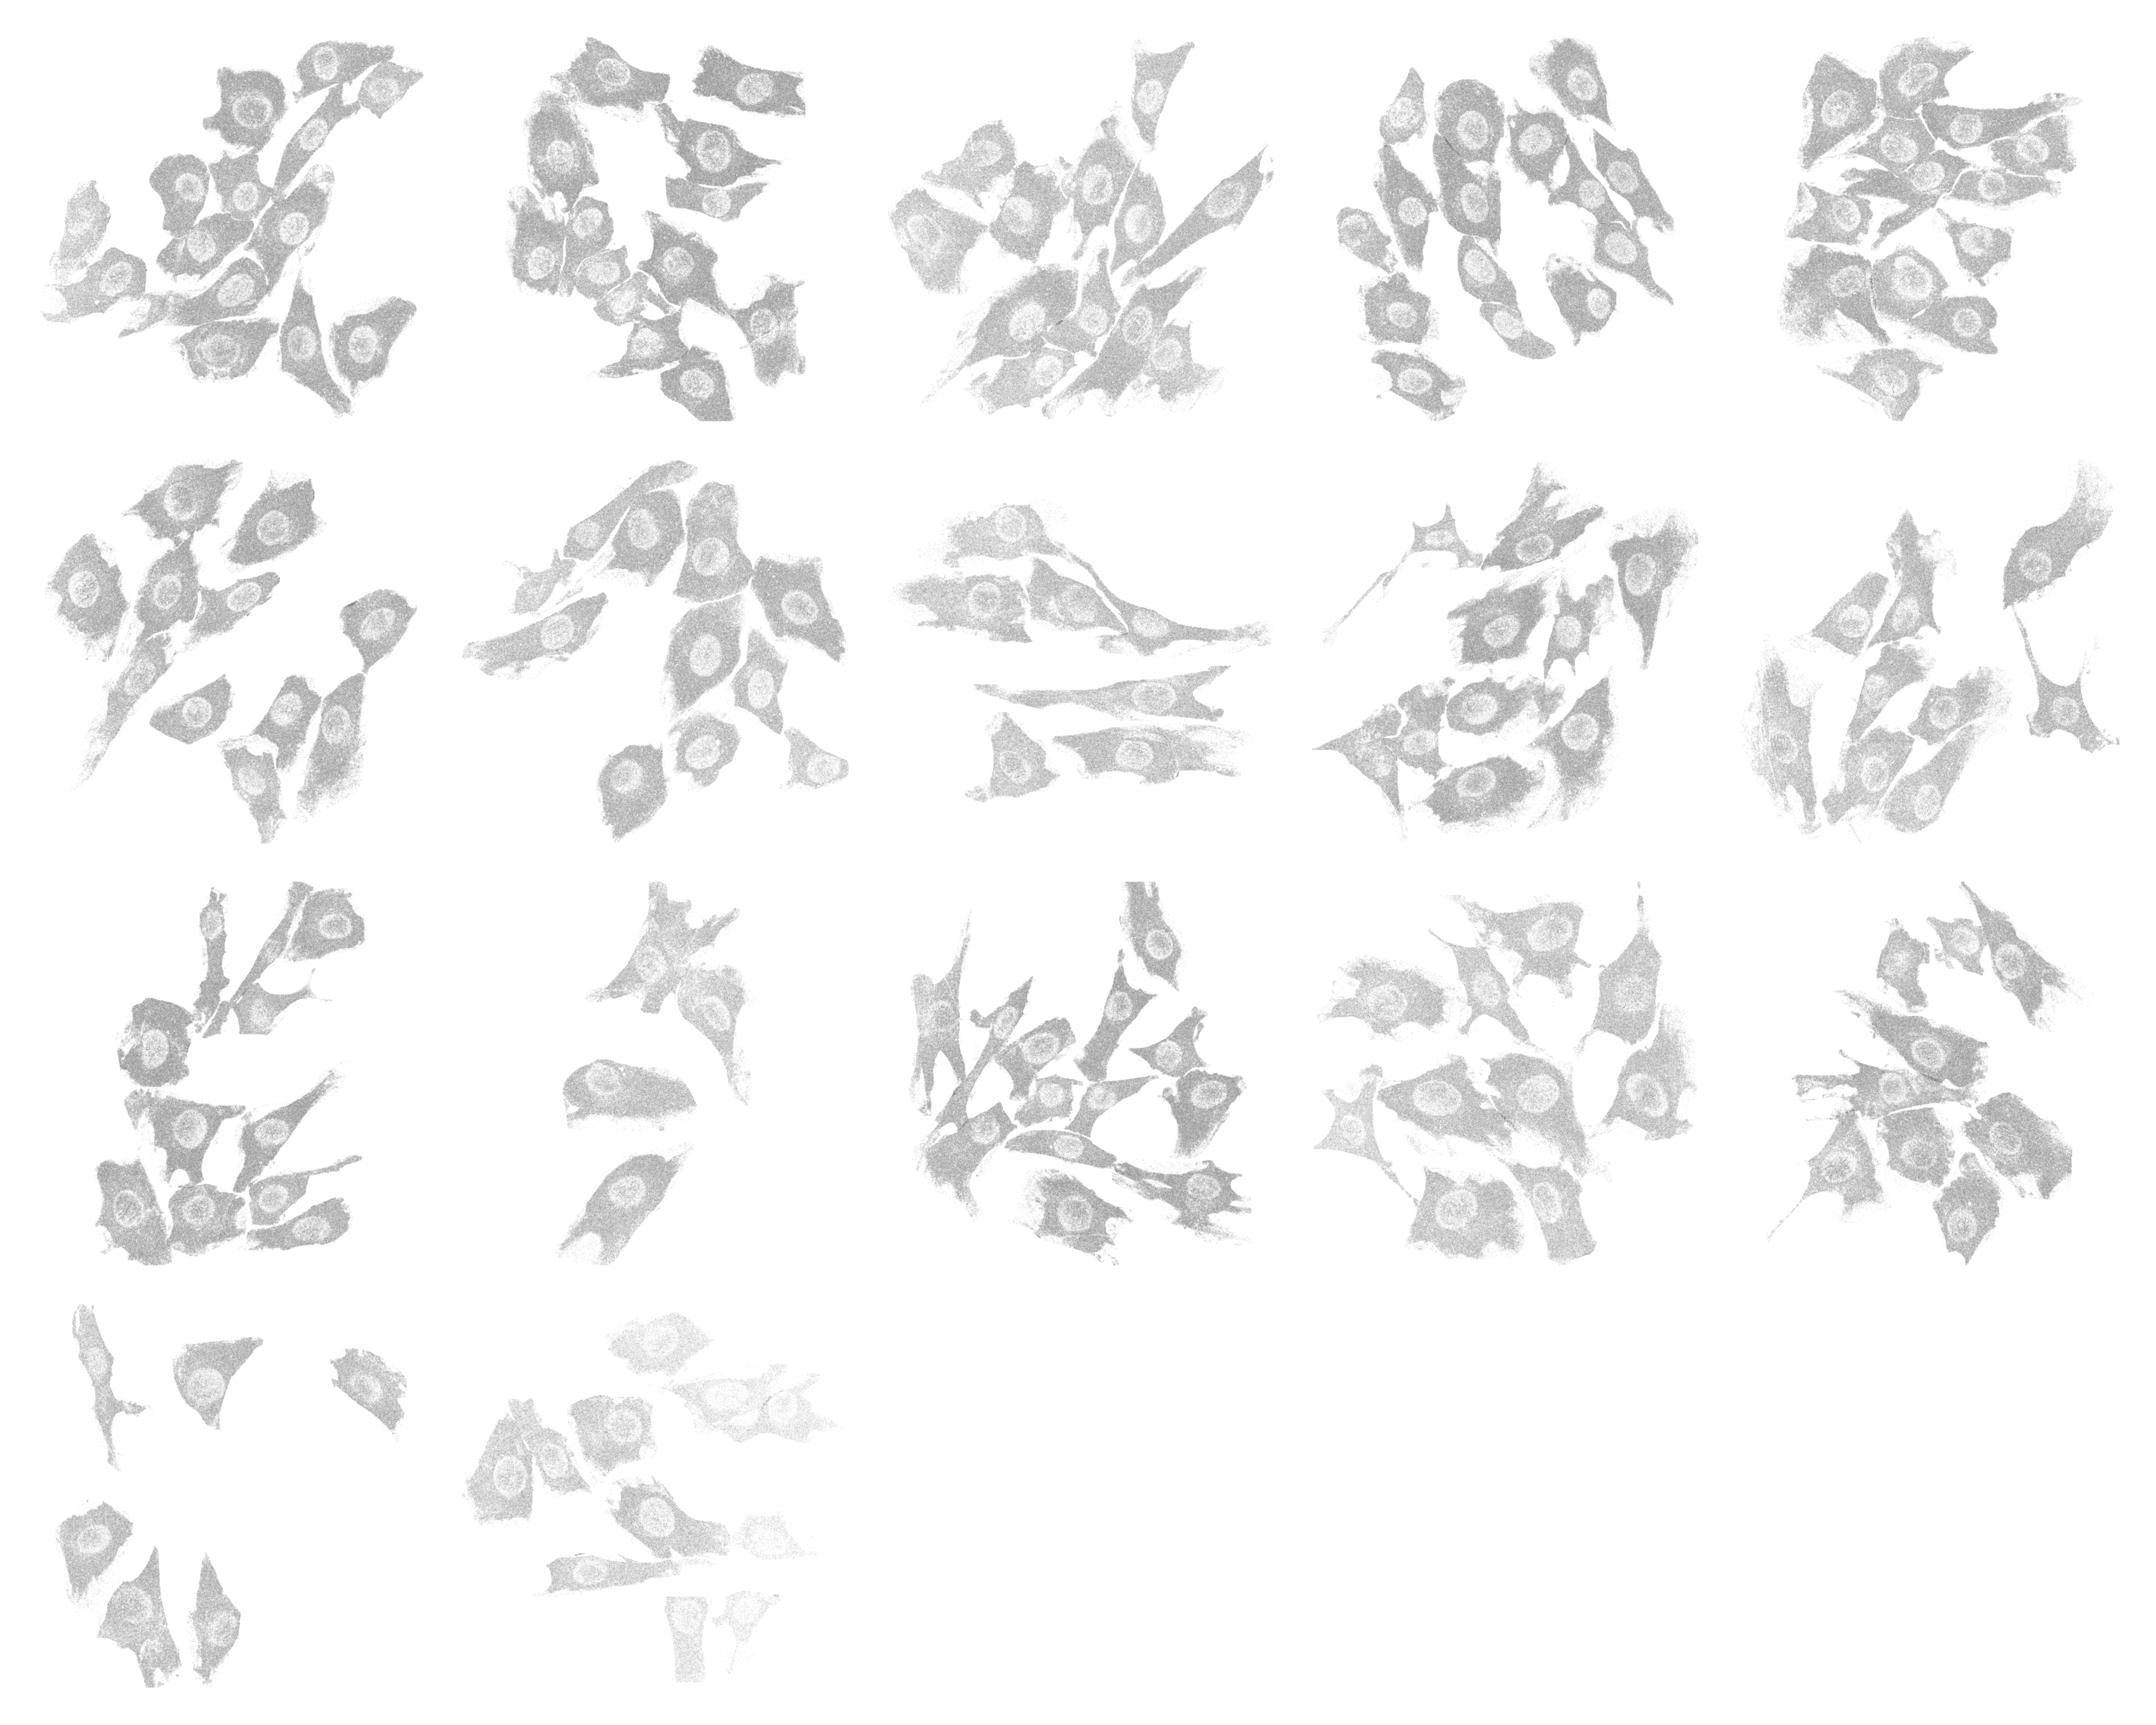

In [62]:
# all barches
bl = points.batch.unique()

nr = 4
nc = 5
ss_nr = 3
ss_nc = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for i, b in enumerate(bl):
    ax = plt.subplot(gs[i//nc, i%nc])
    points_b = points[points.batch==b]
    cl = points_b.cell.unique()
    ax.scatter(points_b.x, points_b.y, 
           marker='.', edgecolor='none',
           color=darkgray,
           s=1, alpha=0.05)
    ax.axis('off')
    ax.set_aspect('equal', adjustable='box')
    
# plt.savefig(f'figs/fov_all.png', dpi=300, bbox_inches='tight')

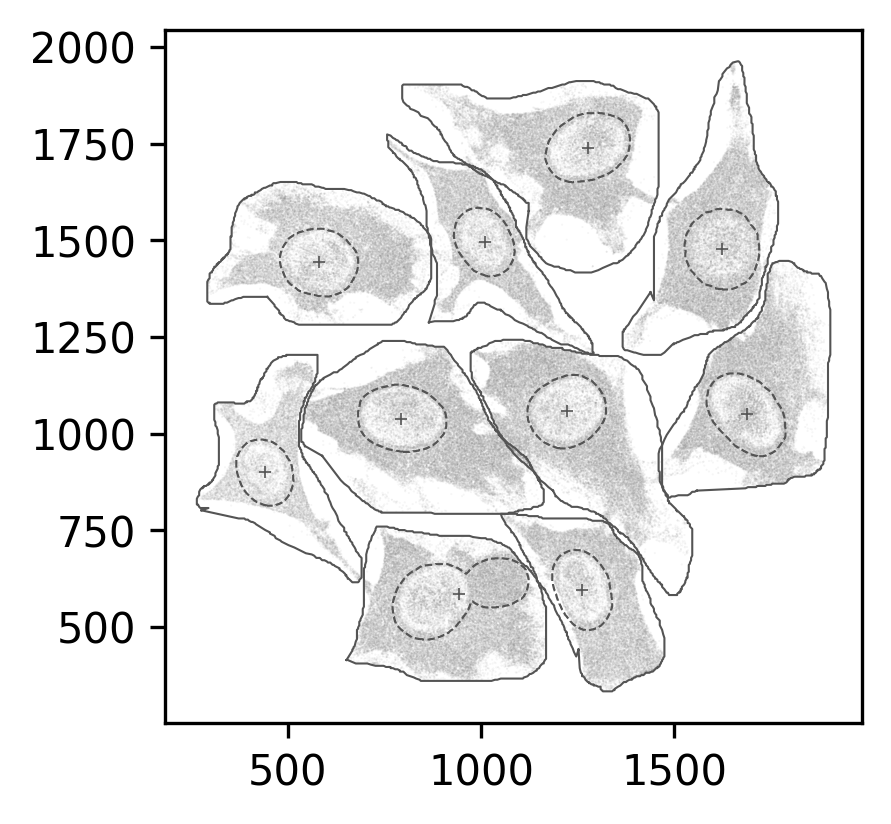

In [63]:
# gene expr

# batch id
b = 13
points_b = points[points.batch==b]
cl = points_b.cell.unique()

nr = 1
nc = 1
ss_nr = 3
ss_nc = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

# all gene expr
ax.scatter(points_b.x, points_b.y, 
           marker='.', edgecolor='none',
           color=darkgray,
           s=1, alpha=0.05)
ax.set_aspect('equal', adjustable='box')

# boundaries
for c in cl:
    i = np.where(np.array(cellList)==c)[0][0]
    
    # cell shape
    cs_c0 = cellShape[i][10:-2].split(')', 1)
    cs_c1 = cs_c0[0]
    cs_c2 = cs_c1.split(',')
    cs_c3 = []
    for j in cs_c2:
        cs_c3.append([int(float(x)) for x in j.strip().split(' ')])
    cs_c = np.array(cs_c3)

    # nucleus shape
    ns_c0 = nucleusShape[i][10:-2].split(')', 1)
    ns_c1 = ns_c0[0]
    ns_c2 = ns_c1.split(',')
    ns_c3 = []
    for j in ns_c2:
        ns_c3.append([int(float(x)) for x in j.strip().split(' ')])
    ns_c = np.array(ns_c3)
    
    ax.plot(ns_c[:,0], ns_c[:,1], lw=0.5, linestyle='dashed', color=darkgray, alpha=1)
    ax.plot(cs_c[:,0], cs_c[:,1], lw=0.5, color=darkgray, alpha=1)
    kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=200, n_init=5)
    pred_y = kmeans.fit_predict(ns_c)
    ax.scatter(round(kmeans.cluster_centers_[0,0]), round(kmeans.cluster_centers_[0,1]), s=8, c=darkgray, marker='+', linewidth=0.4)
    
# plt.savefig(f'figs/fov_b{b}_1.png', dpi=300, bbox_inches='tight')

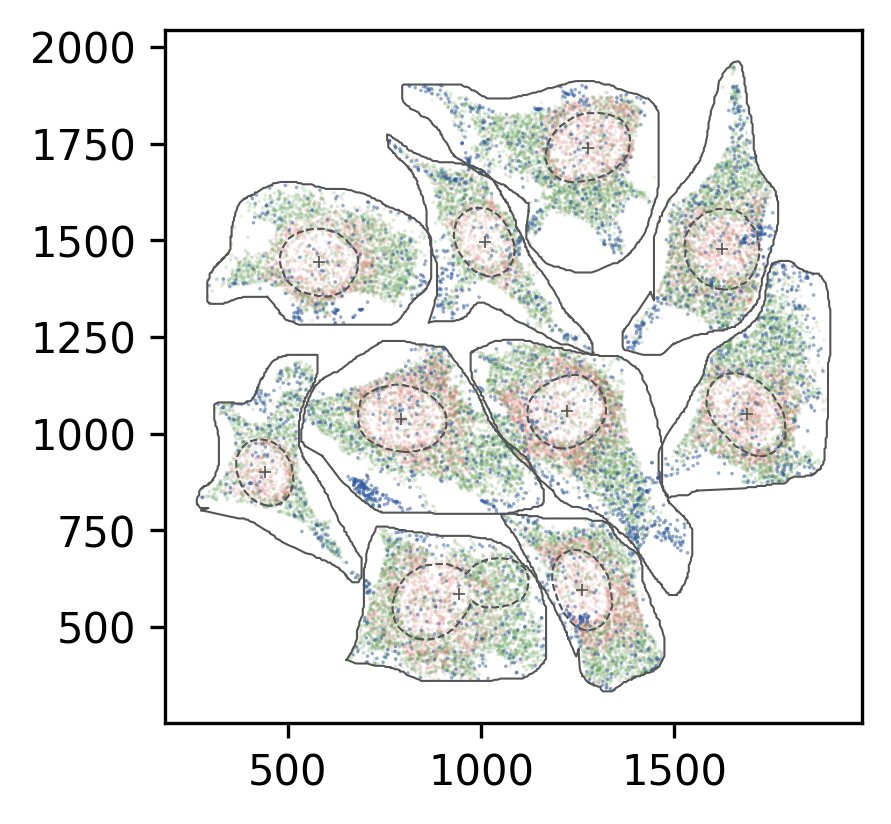

In [64]:
# gene expr

# batch id
b = 13
points_b = points[points.batch==b]
cl = points_b.cell.unique()

protrusion20List = ['Cyb5r3', 'Sh3pxd2a', 'Ddr2', 'Net1', 'Trak2', 
                    'Kif1c', 'Kctd10', 'Dynll2', 'Arhgap11a', 'Gxylt1',
                    'H6pd', 'Gdf11', 'Dync1li2', 'Palld', 'Ppfia1',
                    'Naa50', 'Ptgfr', 'Zeb1', 'Arhgap32', 'Scd1']
nuclear20List = ['Col1a1', 'Fn1', 'Fbln2', 'Col6a2', 'Bgn',
                 'Nid1', 'Lox', 'P4hb', 'Aebp1', 'Emp1', 
                 'Col5a1', 'Sdc4', 'Postn', 'Col3a1', 'Pdia6',
                 'Col5a2', 'Itgb1', 'Calu', 'Pdia3', 'Cyr61']
cytoplasm20List = ['Ddb1', 'Myh9', 'Actn1', 'Tagln2', 'Kpnb1',
                   'Hnrnpf', 'Ppp1ca', 'Hnrnpl', 'Pcbp1', 'Tagln',
                   'Fscn1', 'Psat1', 'Cald1', 'Snd1', 'Uba1',
                   'Hnrnpm', 'Cap1', 'Ssrp1', 'Ugdh', 'Caprin1']

nr = 1
nc = 1
ss_nr = 3
ss_nc = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

# nuclear20List
gl = nuclear20List
points_b_gl = points_b[points_b.gene.isin(gl)]
ax.scatter(points_b_gl.x, points_b_gl.y, 
           marker='.', edgecolor='none',
           color=red,
           zorder=1,
           s=3, alpha=0.1)
ax.set_aspect('equal', adjustable='box')

# cytoplasm20List
gl = cytoplasm20List
points_b_gl = points_b[points_b.gene.isin(gl)]
ax.scatter(points_b_gl.x, points_b_gl.y, 
           marker='.', edgecolor='none',
           color=darkgreen,
           zorder=1,
           s=3, alpha=0.2)
ax.set_aspect('equal', adjustable='box')

# protrusion20List
gl = protrusion20List
points_b_gl = points_b[points_b.gene.isin(gl)]
ax.scatter(points_b_gl.x, points_b_gl.y, 
           marker='.', edgecolor='none',
           color=darkblue,
           zorder=1,
           s=3, alpha=0.5)
ax.set_aspect('equal', adjustable='box')

# boundaries
for c in cl:
    i = np.where(np.array(cellList)==c)[0][0]
    
    # cell shape
    cs_c0 = cellShape[i][10:-2].split(')', 1)
    cs_c1 = cs_c0[0]
    cs_c2 = cs_c1.split(',')
    cs_c3 = []
    for j in cs_c2:
        cs_c3.append([int(float(x)) for x in j.strip().split(' ')])
    cs_c = np.array(cs_c3)

    # nucleus shape
    ns_c0 = nucleusShape[i][10:-2].split(')', 1)
    ns_c1 = ns_c0[0]
    ns_c2 = ns_c1.split(',')
    ns_c3 = []
    for j in ns_c2:
        ns_c3.append([int(float(x)) for x in j.strip().split(' ')])
    ns_c = np.array(ns_c3)
    
    ax.plot(ns_c[:,0], ns_c[:,1], lw=0.5, linestyle='dashed', color=darkgray, alpha=1)
    ax.plot(cs_c[:,0], cs_c[:,1], lw=0.5, color=darkgray, alpha=1)
    kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=200, n_init=5)
    pred_y = kmeans.fit_predict(ns_c)
    ax.scatter(round(kmeans.cluster_centers_[0,0]), round(kmeans.cluster_centers_[0,1]), s=8, c=darkgray, marker='+', linewidth=0.4)
    
plt.savefig(f'figs/fov_b{b}_2.png', dpi=300, bbox_inches='tight')